# Install and Import Libraries

In [ ]:
# Install Data and Visualization Tools
!pip install pandas
!pip install yfinance
!pip install matplotlib
!pip install numpy
# Install Time Series Analysis and Machine Learning Libraries
!pip install statsmodels
!pip install pmdarima

In [1]:
# Import Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# Get Data

In [2]:
# Get the list of stock tickers
tickers=['WMT', 'TGT', 'COST', 'HD', 'DG']
data=yf.download(tickers, start = '2015-01-01', end = None)
data

C:\Users\leonh\AppData\Local\Temp\ipykernel_26264\4083059370.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers, start = '2015-01-01', end = None)
[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            COST          DG          HD         TGT         WMT   
Date                                                                     
2015-01-02  114.297478   61.930447   80.874939   55.703136   23.320911   
2015-01-05  112.998001   61.527962   79.178154   54.704876   23.253040   
2015-01-06  114.491203   60.749245   78.935753   54.697472   23.432220   
2015-01-07  116.484825   61.484180   81.641205   56.767944   24.053928   
2015-01-08  117.485672   60.819237   83.447472   57.034138   24.561619   
...                ...         ...         ...         ...         ...   
2025-07-31  938.340027  104.900002  367.510010  100.500000   97.980003   
2025-08-01  952.520020  108.529999  373.660004   99.769997   98.489998   
2025-08-04  955.369995  110.940002  380.820007   99.790001   99.589996   
2025-08-05  943.630005  110.860001  385.410004  102.430000   99.309998   
2025-08-06  968.559998  113.320000  386.799988  105.389999  103.360001   

Price             High                                                  ...  \
Ticker            COST          DG          HD         TGT         WMT  ...   
Date                                                                    ...   
2015-01-02  115.540450   62.534179   82.618644   56.671821   23.543533  ...   
2015-01-05  114.741402   62.184190   80.366684   55.836241   23.434938  ...   
2015-01-06  115.370971   62.044205   79.811516   55.229880   23.551676  ...   
2015-01-07  116.573597   61.781674   81.688119   56.901046   24.075647  ...   
2015-01-08  117.921528   61.615457   83.658590   57.492602   24.615916  ...   
...                ...         ...         ...         ...         ...  ...   
2025-07-31  944.641295  106.349998  372.809998  102.629997   98.629997  ...   
2025-08-01  956.719971  109.029999  374.799988  100.309998   98.830002  ...   
2025-08-04  960.179993  111.230003  381.899994  101.059998   99.910004  ...   
2025-08-05  951.500000  111.650002  386.940002  102.959999  100.470001  ...   
2025-08-06  970.549988  114.300003  388.929993  106.360001  103.690002  ...   

Price             Open                                                 \
Ticker            COST          DG          HD         TGT        WMT   
Date                                                                    
2015-01-02  114.507327   61.860447   82.227679   56.279910  23.421362   
2015-01-05  114.362050   61.685457   80.366684   55.584823  23.272046   
2015-01-06  113.490359   61.667967   79.811516   54.941493  23.342629   
2015-01-07  115.096563   61.265438   79.983513   55.370375  23.559818   
2015-01-08  117.485672   61.247971   82.391869   56.797512  24.219542   
...                ...         ...         ...         ...        ...   
2025-07-31  924.079754  105.000000  369.170013  102.349998  97.440002   
2025-08-01  939.500000  105.320000  367.820007   99.519997  98.000000   
2025-08-04  952.599976  108.330002  374.839996  100.010002  98.199997   
2025-08-05  951.330017  109.779999  381.859985  100.059998  99.669998   
2025-08-06  943.630005  111.480003  386.079987  103.470001  99.459999   

Price        Volume                                       
Ticker         COST       DG       HD      TGT       WMT  
Date                                                      
2015-01-02  1471000  2717000  4323700  3710300  13505400  
2015-01-05  1748500  2508500  5878100  3778200  20937000  
2015-01-06  3185200  3640300  4910100  4659300  24615300  
2015-01-07  2171600  4239000  5091000  6946900  25495200  
2015-01-08  2937700  8738500  6464600  6344900  38140800  
...             ...      ...      ...      ...       ...  
2025-07-31  2564400  3133300  3091600  6442300  15651300  
2025-08-01  2934500  4216800  3008200  5021700  16750400  
2025-08-04  2389900  3329000  2844300  5312700  19050200  
2025-08-05  2462300  2972700  2931400  5093400  17977000  
2025-08-06  2751000  2858800  2812400  6304500  23731400  

[2664 

In [3]:
monthly_data=data['Close'].asfreq('ME', method='pad')
wmt_data=monthly_data['WMT']
tgt_data=monthly_data['TGT']
cost_data=monthly_data['COST']
hd_data=monthly_data['HD']
dg_data=monthly_data['DG']

# Plot Data

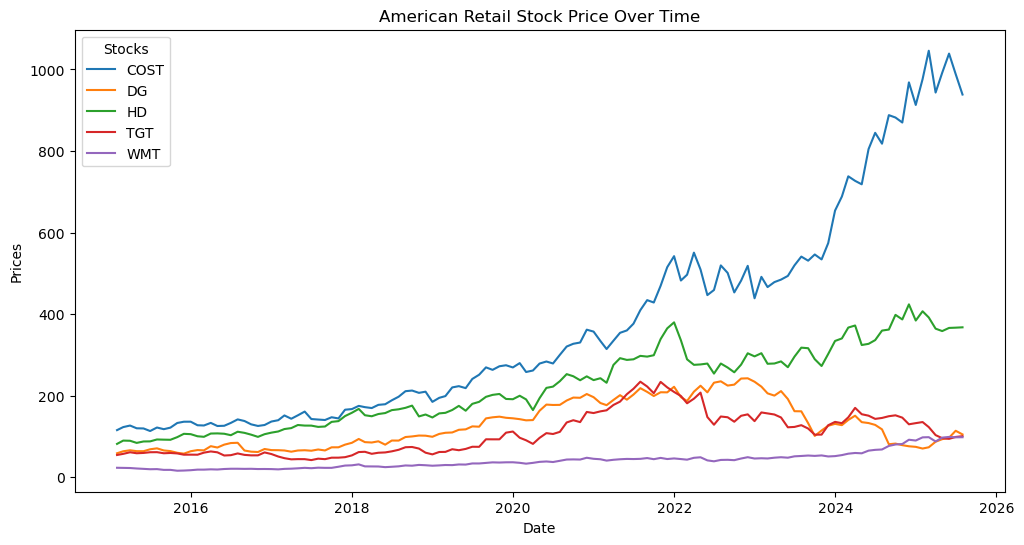

In [4]:
plt.figure(figsize=(12, 6))
for column in monthly_data.columns:
    plt.plot(monthly_data[column], label=column)
plt.title('American Retail Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.grid(False)
plt.legend(title='Stocks')
plt.show()

# Method 1: Manual ARIMA Model

In [5]:
wmt_data.tail()

Date
2025-03-31    87.578255
2025-04-30    97.015434
2025-05-31    98.720001
2025-06-30    97.779999
2025-07-31    97.980003
Freq: ME, Name: WMT, dtype: float64

In [6]:
wmt_model = ARIMA(wmt_data, order=(1, 1, 1))
wmt_results = wmt_model.fit()
wmt_forecast = wmt_results.forecast(steps=5)
wmt_forecast

2025-08-31    97.962699
2025-09-30    97.964232
2025-10-31    97.964096
2025-11-30    97.964108
2025-12-31    97.964107
Freq: ME, Name: predicted_mean, dtype: float64

# Method 2: Auto ARIMA Model

In [7]:
def optimal_order(data):
    optimal_model = pm.auto_arima(data, start_p=0, start_q=0, seasonal=False, stepwise=False, suppress_warnings=True, error_action='ignore')
    return optimal_model.order

In [8]:
def auto_arima_forecast(data):
    model = ARIMA(data, order=optimal_order(data))
    results=model.fit()
    forecast=results.forecast(steps=5)
    return forecast

In [9]:
wmt_data.tail(), auto_arima_forecast(wmt_data)

(Date
 2025-03-31    87.578255
 2025-04-30    97.015434
 2025-05-31    98.720001
 2025-06-30    97.779999
 2025-07-31    97.980003
 Freq: ME, Name: WMT, dtype: float64,
 2025-08-31    100.751773
 2025-09-30    102.526462
 2025-10-31    104.062324
 2025-11-30    105.875720
 2025-12-31    107.656605
 Freq: ME, Name: predicted_mean, dtype: float64)

In [10]:
tgt_data.tail(), auto_arima_forecast(tgt_data)

(Date
 2025-03-31    103.180435
 2025-04-30     95.607010
 2025-05-31     94.010002
 2025-06-30     98.650002
 2025-07-31    100.500000
 Freq: ME, Name: TGT, dtype: float64,
 2025-08-31     96.857131
 2025-09-30     97.137507
 2025-10-31    100.666826
 2025-11-30    102.062394
 2025-12-31    102.062394
 Freq: ME, Name: predicted_mean, dtype: float64)

In [11]:
cost_data.tail(), auto_arima_forecast(cost_data)

(Date
 2025-03-31     943.242554
 2025-04-30     991.831848
 2025-05-31    1038.740967
 2025-06-30     988.570435
 2025-07-31     938.340027
 Freq: ME, Name: COST, dtype: float64,
 2025-08-31    958.495231
 2025-09-30    961.491099
 2025-10-31    937.021437
 2025-11-30    937.021437
 2025-12-31    937.021437
 Freq: ME, Name: predicted_mean, dtype: float64)

In [12]:
hd_data.tail(), auto_arima_forecast(hd_data)

(Date
 2025-03-31    364.226471
 2025-04-30    358.263550
 2025-05-31    366.015381
 2025-06-30    366.640015
 2025-07-31    367.510010
 Freq: ME, Name: HD, dtype: float64,
 2025-08-31    371.334139
 2025-09-30    372.138639
 2025-10-31    370.385266
 2025-11-30    369.536258
 2025-12-31    369.223155
 Freq: ME, Name: predicted_mean, dtype: float64)

In [13]:
dg_data.tail(), auto_arima_forecast(dg_data)

(Date
 2025-03-31     86.923004
 2025-04-30     93.214706
 2025-05-31     96.756645
 2025-06-30    113.799736
 2025-07-31    104.900002
 Freq: ME, Name: DG, dtype: float64,
 2025-08-31     98.171743
 2025-09-30     99.620568
 2025-10-31    102.764431
 2025-11-30    101.269573
 2025-12-31     98.456309
 Freq: ME, Name: predicted_mean, dtype: float64)

# Plot Historical and Forecast with MatPlotLib

In [14]:
def plot_forecast(data):
    historical = data.tail()
    forecast = auto_arima_forecast(data)
    combined_series = pd.concat([historical, forecast])
    plt.figure(figsize=(12,6))
    plt.title('Forecast Prices')    
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.plot(combined_series[0:5], color='blue', label='Historical Prices')
    plt.plot(combined_series[4:], color='orange', label='Forecast Prices')
    plt.grid(True)
    

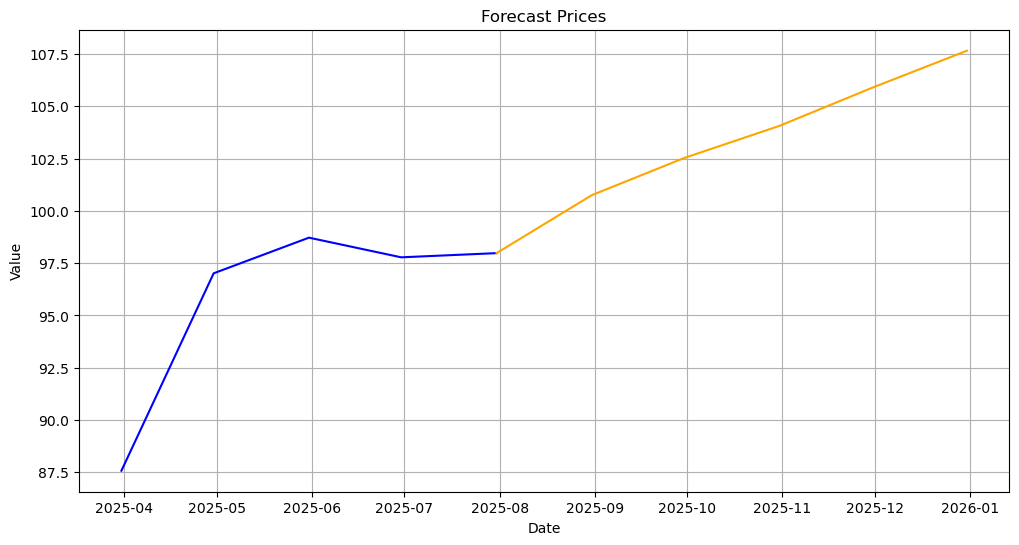

In [15]:
plot_forecast(wmt_data)

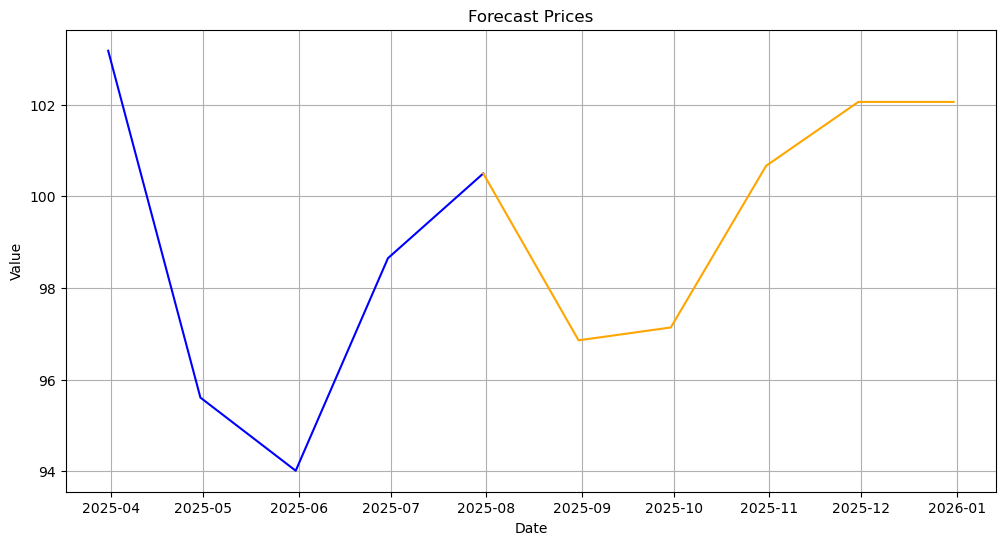

In [16]:
plot_forecast(tgt_data)

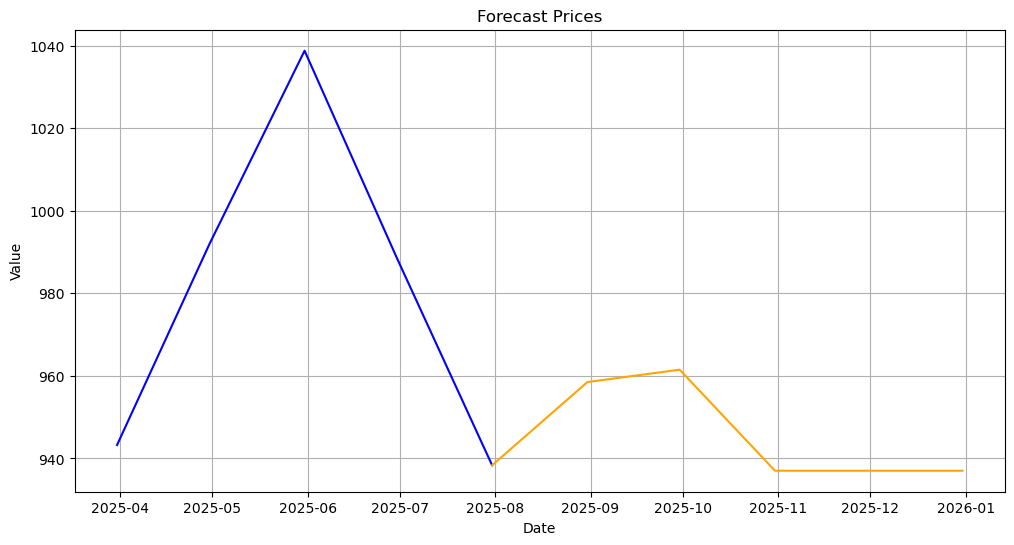

In [17]:
plot_forecast(cost_data)

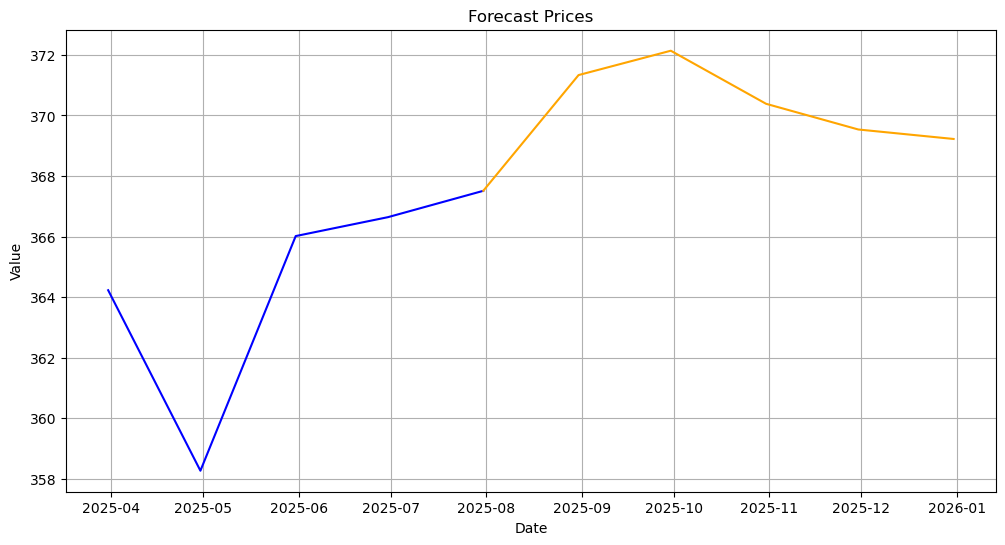

In [18]:
plot_forecast(hd_data)

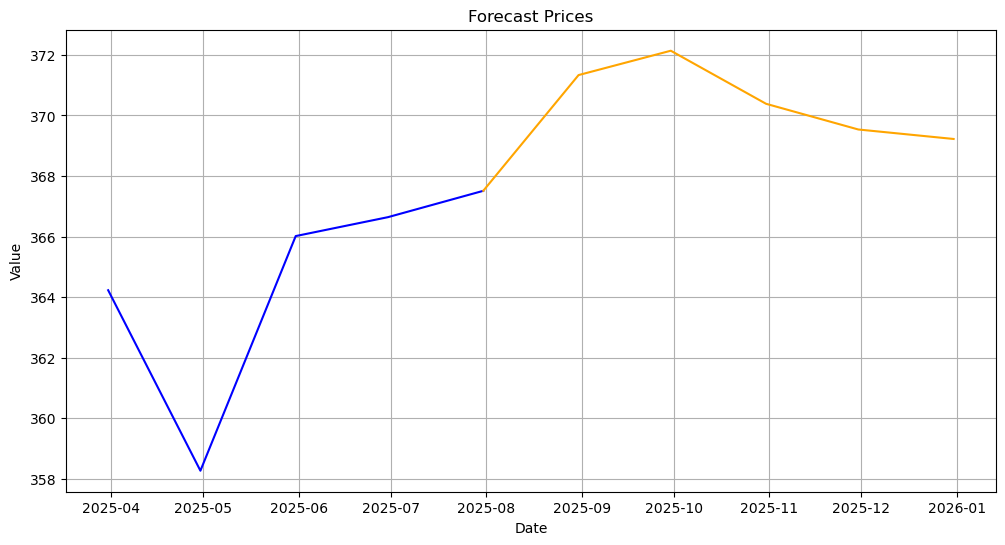

In [19]:
plot_forecast(hd_data)

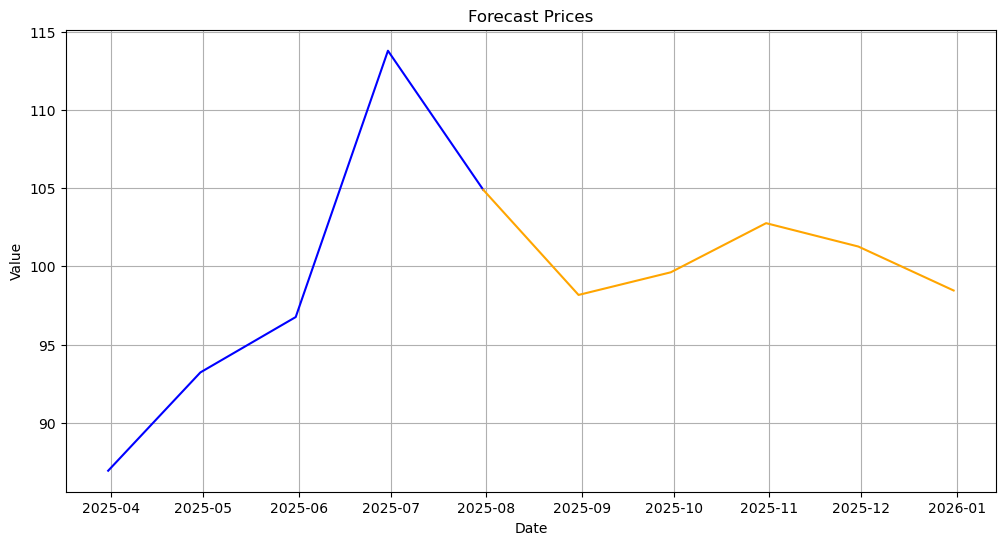

In [20]:
plot_forecast(dg_data)